In [143]:
import random
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Notebook playground to find appropriate directed graph classes

## [Intrinsically Directed](https://networkx.org/documentation/stable/reference/generators.html#module-networkx.generators.directed)
### 1. Growwing Network
a) Basic (GN)
- The GN graph is built by adding nodes one at a time with a link to one previously added node. The target node for the link is chosen with probability based on degree. The default attachment kernel is a linear function of the degree of a node. 
- `kernel` controlls the distribution (`1/x` seems to work quite well) 

b) Redirected (GNR)
- Redirects the newly added edge with probability `p` (redirection seems not to work...)  

c) Copy (GNC)
- Adds connection to all successors
- COULD WORK (but with added kernel)

### [Scale Free Graph](https://networkx.org/documentation/stable/reference/generated/networkx.generators.directed.scale_free_graph.html#networkx.generators.directed.scale_free_graph)

## From Undirected
### 1. erdos_renyi_graph
- `n` - number of nodes (Constant 100)
- `p` - probability for edge creation (variable)
- Differs only by the node degree, so it will be trivial to LDP

### 2. barabasi_albert_graph
- Need to reimplement for directed version
  - e.g. based on indegree

In [476]:
def load_networkx_graph(path: str) -> nx.DiGraph:
    np_network = np.load(path)
    return nx.DiGraph(np_network)

def draw(g: nx.DiGraph, with_labels=False):
    nx.draw(g, pos=nx.circular_layout(g), node_size=5, width=0.1, with_labels=with_labels)
    plt.show()

def shuffle_digraph(g: nx.DiGraph, seed: int = 42) -> nx.DiGraph:

    # Collect edges
    new_edges = []
    for u, v in g.edges():
        new_edges.append((u, v))

    # Shuffle edges
    random.Random(seed).shuffle(new_edges)

    # Create a new graph and return it
    return nx.DiGraph(new_edges)

In [486]:
seed = random.randint(0, 1000)
config = {
    "n": 100,
    "alpha": 0.9,
    "beta": 0.05,
    "gamma": 0.05,
    "delta_in": 0.,
    "delta_out": 0.0,
}
n_initial = 10

# Create initial clique graph
# g_init = nx.MultiDiGraph(nx.complete_graph(9))
g_init = nx.MultiDiGraph([(i, (i+1)%n_initial) for i in range(n_initial)])

# Create a scale-free directed graph
G = nx.scale_free_graph(**config, initial_graph=g_init, seed=seed)

# Convert multigraph to a simple graph
G = nx.DiGraph(G)

# Remove self-loops
G.remove_edges_from(nx.selfloop_edges(G))

# Reorder nodes
G = shuffle_digraph(G, seed=seed)

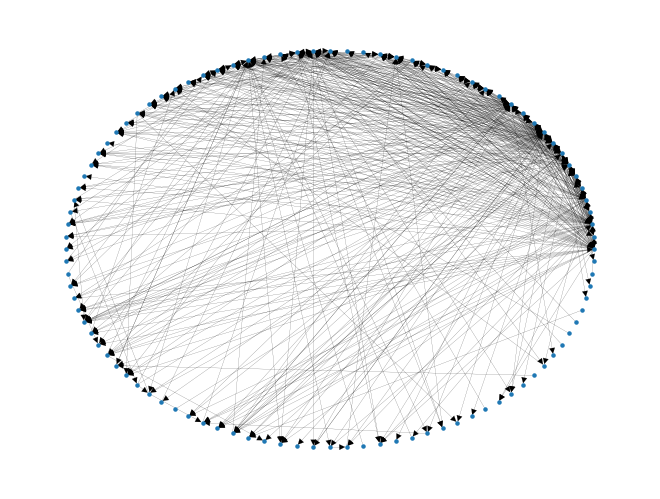

Number of edges: 504


In [481]:
# Print the graph
draw(G)

# Count the number of edges
print(f"Number of edges: {G.number_of_edges()}")

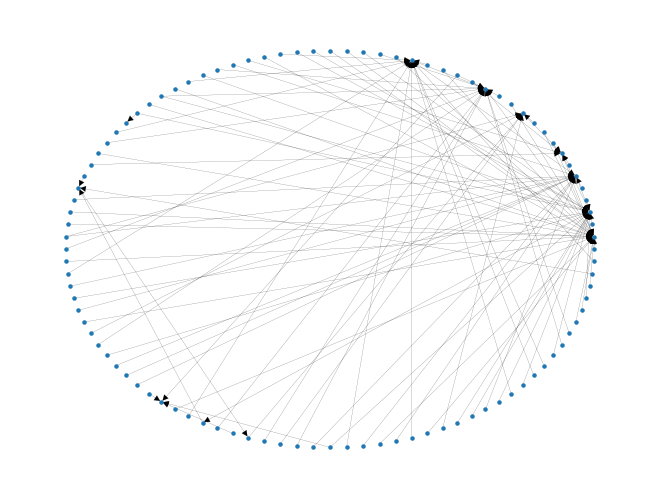

Number of edges: 104


In [487]:
# Print the graph
draw(G)

# Count the number of edges
print(f"Number of edges: {G.number_of_edges()}")

In [445]:
G.edges()

OutEdgeView([(6, 7), (7, 8), (9, 0), (0, 1), (8, 9), (5, 6), (1, 2), (2, 3), (3, 4), (4, 5)])

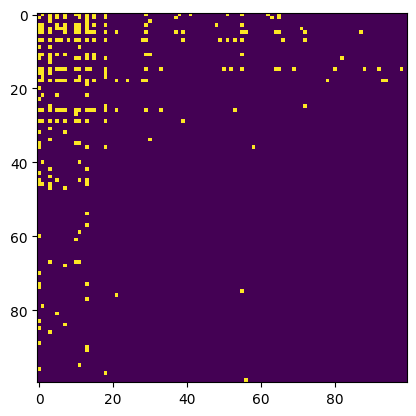

In [449]:
# Conver to adjacency matrix
A = nx.to_numpy_array(G)

plt.imshow(A, cmap='viridis')

In [498]:
dir_path = "/Users/wciezobka/sano/projects/masters-thesis/Datasets/Synthetic/ScaleFreeBias/networks"
net_a = load_networkx_graph(f"{dir_path}/class_a_422.npy")
net_b = load_networkx_graph(f"{dir_path}/class_b_422.npy")

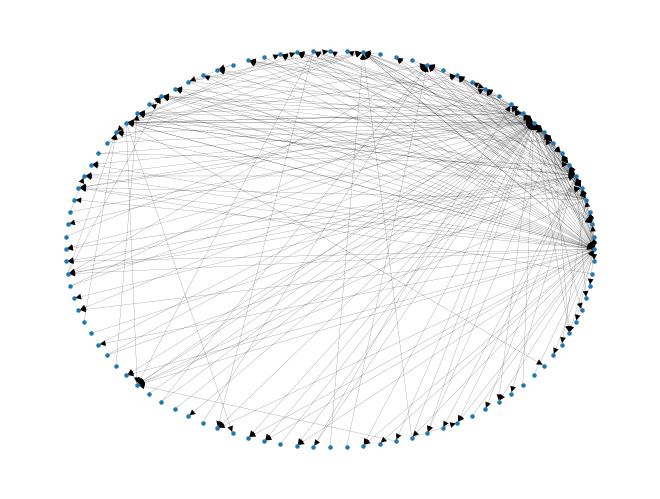

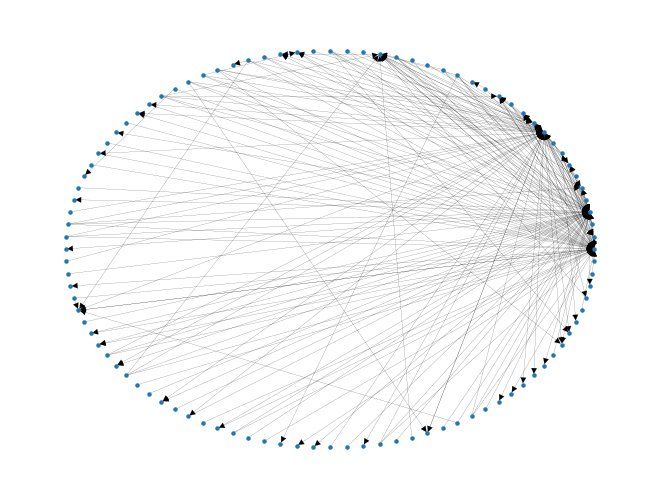

In [499]:
draw(net_a)
draw(net_b)